In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs= zip(lats, lngs)
lat_lngs

In [3]:
#Add the Latitudes and Longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2498ebfe0a1a951c5b13297bc26a8f1


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2498ebfe0a1a951c5b13297bc26a8f1&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04d"}],"base":"stations","main":{"temp":45.5,"feels_like":41.52,"temp_min":37.4,"temp_max":51.8,"pressure":1035,"humidity":81},"visibility":10000,"wind":{"speed":3.11,"deg":137},"clouds":{"all":75},"dt":1603028194,"sys":{"type":1,"id":3486,"country":"US","sunrise":1603018857,"sunset":1603058237},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 45.5,
  'feels_like': 41.52,
  'temp_min': 37.4,
  'temp_max': 51.8,
  'pressure': 1035,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 3.11, 'deg': 137},
 'clouds': {'all': 75},
 'dt': 1603028194,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603018857,
  'sunset': 1603058237},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 45.5,
  'feels_like': 41.52,
  'temp_min': 37.4,
  'temp_max': 51.8,
  'pressure': 1035,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 3.11, 'deg': 137},
 'clouds': {'all': 75},
 'dt': 1603028194,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603018857,
  'sunset': 1603058237},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 51.8 81 75 3.11


In [18]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-10-18 13:36:34'

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dar es salaam
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | soyo
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | chorbog
City not found. Skipping...
Processing Record 10 of Set 1 | barra do garcas
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | plettenberg bay
Processing Record 13 of Set 1 | vallenar
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | puerto narino
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | cabo rojo
Processing Record 18 of Set 1 | liverpool
Processing Record 19 of Set 1 | inirida
Processing Record 20 of Set 1 | bolobo
Processing Record 21 of Se

Processing Record 39 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 40 of Set 4 | castro
Processing Record 41 of Set 4 | aksu
Processing Record 42 of Set 4 | hopelchen
Processing Record 43 of Set 4 | buta
Processing Record 44 of Set 4 | shahriyar
City not found. Skipping...
Processing Record 45 of Set 4 | prado
Processing Record 46 of Set 4 | jahrom
City not found. Skipping...
Processing Record 47 of Set 4 | harper
Processing Record 48 of Set 4 | stokmarknes
Processing Record 49 of Set 4 | abha
Processing Record 50 of Set 4 | le moule
Processing Record 1 of Set 5 | tres arroyos
Processing Record 2 of Set 5 | beyla
Processing Record 3 of Set 5 | maghama
City not found. Skipping...
Processing Record 4 of Set 5 | calbuco
Processing Record 5 of Set 5 | arona
Processing Record 6 of Set 5 | promakhoi
City not found. Skipping...
Processing Record 7 of Set 5 | begoro
Processing Record 8 of Set 5 | puerto madryn
Processing Record 9 of Set 5 | vila velha
Processing Record 10

Processing Record 28 of Set 8 | henties bay
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | nouadhibou
Processing Record 31 of Set 8 | wattegama
Processing Record 32 of Set 8 | garowe
Processing Record 33 of Set 8 | campbellton
Processing Record 34 of Set 8 | zabol
Processing Record 35 of Set 8 | meulaboh
Processing Record 36 of Set 8 | garca
Processing Record 37 of Set 8 | mbale
Processing Record 38 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 39 of Set 8 | onega
Processing Record 40 of Set 8 | mbengwi
Processing Record 41 of Set 8 | mattru
Processing Record 42 of Set 8 | aflu
City not found. Skipping...
Processing Record 43 of Set 8 | letka
Processing Record 44 of Set 8 | sarkand
Processing Record 45 of Set 8 | dixon
Processing Record 46 of Set 8 | san andres
Processing Record 47 of Set 8 | piranhas
Processing Record 48 of Set 8 | sohag
Processing Record 49 of Set 8 | colmenar viejo
Processing Record 50 of Set 8 | birao
Processing Recor

Processing Record 18 of Set 12 | rincon
Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | pithiviers
Processing Record 21 of Set 12 | camocim
Processing Record 22 of Set 12 | pedasi
Processing Record 23 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 24 of Set 12 | mpika
Processing Record 25 of Set 12 | zyryanovskiy
City not found. Skipping...
Processing Record 26 of Set 12 | tsiroanomandidy
Processing Record 27 of Set 12 | zambezi
Processing Record 28 of Set 12 | palmares do sul
Processing Record 29 of Set 12 | vijapur
Processing Record 30 of Set 12 | nouakchott
Processing Record 31 of Set 12 | sinj
Processing Record 32 of Set 12 | natal
Processing Record 33 of Set 12 | itapeva
Processing Record 34 of Set 12 | dagda
Processing Record 35 of Set 12 | port-cartier
Processing Record 36 of Set 12 | krasnoselkup
Processing Record 37 of Set 12 | buncrana
Processing Record 38 of Set 12 | gravdal
Processing Record 39 of Set 12 | marsaxlokk
Proces

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dar Es Salaam,-6.82,39.27,89.60,49,20,11.41,TZ,2020-10-18 13:36:32
1,Mar Del Plata,-38.00,-57.56,73.40,78,100,13.87,AR,2020-10-18 13:35:50
2,Soyo,-6.13,12.37,80.31,78,52,11.36,AO,2020-10-18 13:39:28
3,Port Elizabeth,-33.92,25.57,68.00,56,66,20.80,ZA,2020-10-18 13:37:29
4,Torbay,47.67,-52.73,54.00,100,90,11.41,CA,2020-10-18 13:35:18
...,...,...,...,...,...,...,...,...,...
580,Sao Jose Da Coroa Grande,-8.90,-35.15,81.37,63,30,11.48,BR,2020-10-18 13:40:56
581,Cassilandia,-19.11,-51.73,90.52,39,82,8.61,BR,2020-10-18 13:40:56
582,Iralaya,15.00,-83.23,79.38,86,100,5.70,HN,2020-10-18 13:40:56
583,Walvis Bay,-22.96,14.51,77.00,47,0,12.75,NA,2020-10-18 13:40:57


In [21]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dar Es Salaam,TZ,2020-10-18 13:36:32,-6.82,39.27,89.60,49,20,11.41
1,Mar Del Plata,AR,2020-10-18 13:35:50,-38.00,-57.56,73.40,78,100,13.87
2,Soyo,AO,2020-10-18 13:39:28,-6.13,12.37,80.31,78,52,11.36
3,Port Elizabeth,ZA,2020-10-18 13:37:29,-33.92,25.57,68.00,56,66,20.80
4,Torbay,CA,2020-10-18 13:35:18,47.67,-52.73,54.00,100,90,11.41
...,...,...,...,...,...,...,...,...,...
580,Sao Jose Da Coroa Grande,BR,2020-10-18 13:40:56,-8.90,-35.15,81.37,63,30,11.48
581,Cassilandia,BR,2020-10-18 13:40:56,-19.11,-51.73,90.52,39,82,8.61
582,Iralaya,HN,2020-10-18 13:40:56,15.00,-83.23,79.38,86,100,5.70
583,Walvis Bay,NA,2020-10-18 13:40:57,-22.96,14.51,77.00,47,0,12.75


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603028459.4207292

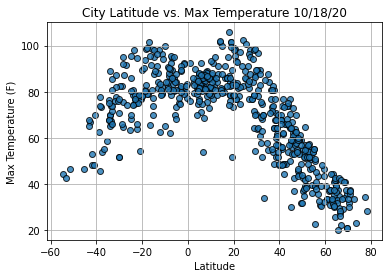

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

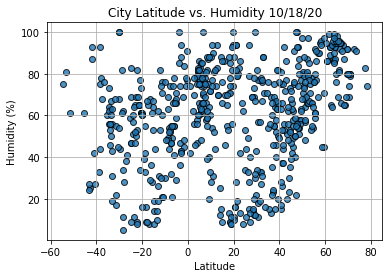

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

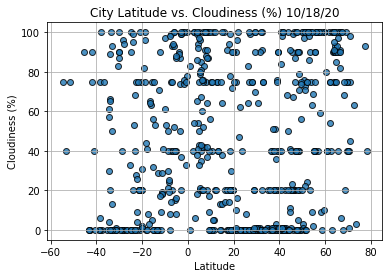

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

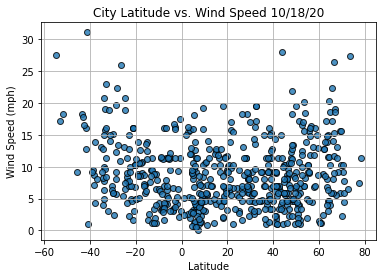

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Torbay,CA,2020-10-18 13:35:18,47.67,-52.73,54.00,100,90,11.41
5,Jamestown,US,2020-10-18 13:34:46,42.10,-79.24,48.99,56,1,11.41
8,Saint George,US,2020-10-18 13:38:53,37.10,-113.58,54.00,23,1,1.01
14,Cabo Rojo,PR,2020-10-18 13:39:30,18.09,-67.15,87.01,71,94,1.99
15,Liverpool,GB,2020-10-18 13:38:47,53.41,-2.98,55.40,71,20,6.93
...,...,...,...,...,...,...,...,...,...
576,Balky,UA,2020-10-18 13:40:55,47.38,34.94,62.60,55,40,6.71
577,Bainbridge,US,2020-10-18 13:40:56,47.63,-122.52,54.00,93,100,10.54
578,Seminole,US,2020-10-18 13:40:56,28.71,-81.21,78.80,78,1,6.93
579,Ndele,CF,2020-10-18 13:40:56,8.41,20.65,86.94,59,42,4.43


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

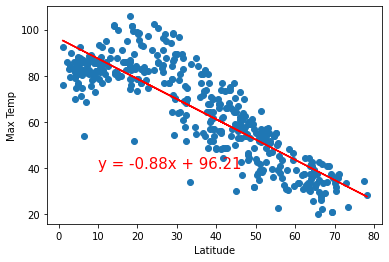

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

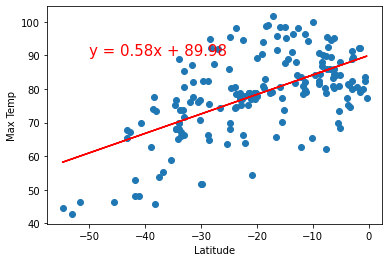

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

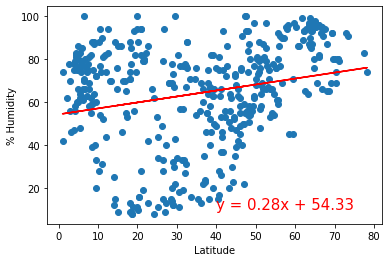

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

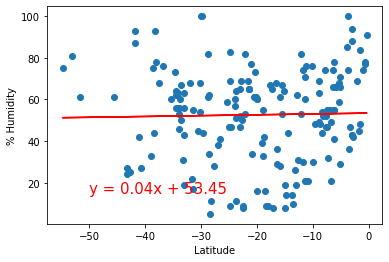

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

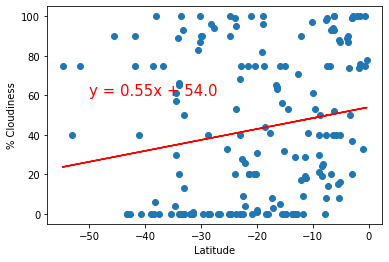

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

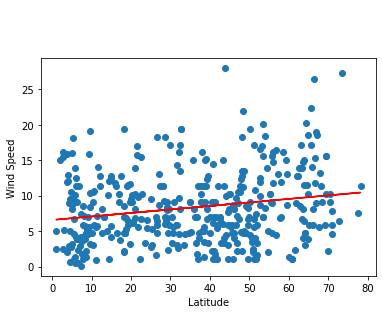

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

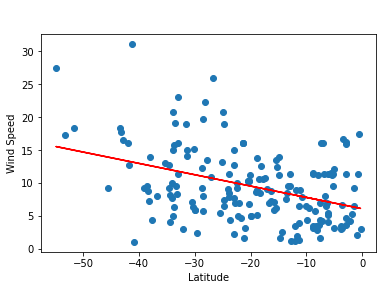

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))